# DeepSVDD  -  Deep One-Class Classification for outlier detection
### Deep One-Class Classifier with AutoEncoder (AE) is a type of neural networks for learning useful data representations in an unsupervised way. DeepSVDD trains a neural network while minimizing the volume of a hypersphere that encloses the network representations of the data, forcing the network to extract the common factors of variation. Similar to PCA, DeepSVDD could be used to detect outlying objects in the data by calculating the distance from center
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.deep_svdd

### Arguments that work with DeepSVDD  algorithm:
1. c=c,
2. use_ae=use_ae,
3. hidden_neurons
4. hidden_activation
5. output_activation
6. optimizer
7. epochs
8. batch_size
9. dropout_rate
10. l2_regularizer
11. validation_size
12. preprocessing
13. verbose
14. random_state
15. contamination

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took    41.740479 seconds
image downsampling       ...took     0.760728 seconds
image downsampling       ...took     1.244148 seconds
image downsampling       ...took     2.305033 seconds
image downsampling       ...took     3.369079 seconds
image downsampling       ...took     6.162838 seconds
image downsampling       ...took     6.639362 seconds
image downsampling       ...took     7.111595 seconds
image downsampling       ...took     7.585605 seconds
image downsampling       ...took     8.643631 seconds
image downsampling       ...took     9.700687 seconds
image downsampling       ...took    10.762828 seconds
image downsampling       ...took    11.845047 seconds
image downsampling       ...took    12.320267 seconds
image downsampling       ...took    13.778781 seconds
image downsampling       ...took    14.856431 seconds
image downsampling       ...took    15.335283 seconds
image downsampling       ...took    16.417270 seconds
image downsampling       ...

2022-08-27 23:17:01.731553: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-27 23:17:03.147953: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-08-27 23:17:03.294860: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-27 23:17:03.294905: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-27 23:17:03.298282: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-08-27 23:17:03.298325: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                262144    
_________________________________________________________________
net_output (Dense)           (None, 32)                2048      
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 32)                0         
_________________________________________________________________
tf.math.pow_1 (TFOpLambda)   (None, 32)                0         
_________________________________________________________________
tf.math.reduce_sum_1 (TFOpLa (None,)                   0         
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL ()                        0   

3/3 [==============================] - 0s 10ms/step - loss: 4.2491 - val_loss: 17.3000
Epoch 68/100
3/3 [==============================] - 0s 10ms/step - loss: 4.6691 - val_loss: 17.1151
Epoch 69/100
3/3 [==============================] - 0s 10ms/step - loss: 4.5360 - val_loss: 32.6652
Epoch 70/100
3/3 [==============================] - 0s 10ms/step - loss: 4.9077 - val_loss: 21.3734
Epoch 71/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1914 - val_loss: 19.4360
Epoch 72/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1834 - val_loss: 23.2251
Epoch 73/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1356 - val_loss: 27.1405
Epoch 74/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1020 - val_loss: 25.1514
Epoch 75/100
3/3 [==============================] - 0s 10ms/step - loss: 4.0883 - val_loss: 19.8304
Epoch 76/100
3/3 [==============================] - 0s 10ms/step - loss: 4.2338 - val_loss: 26.6068
Epoch 77/100


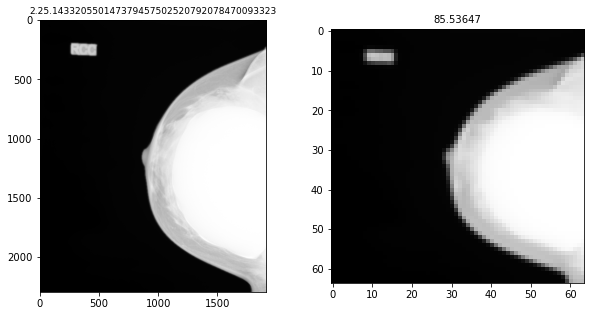

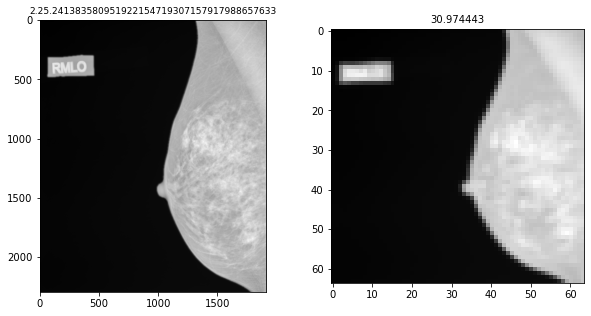

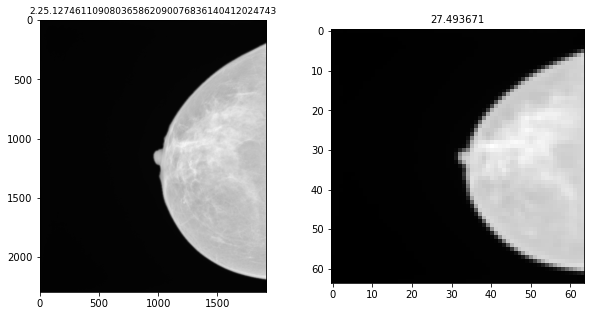

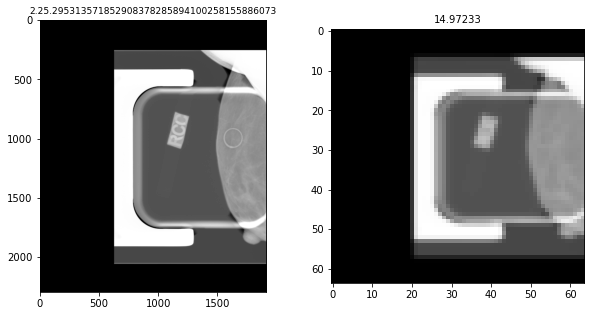

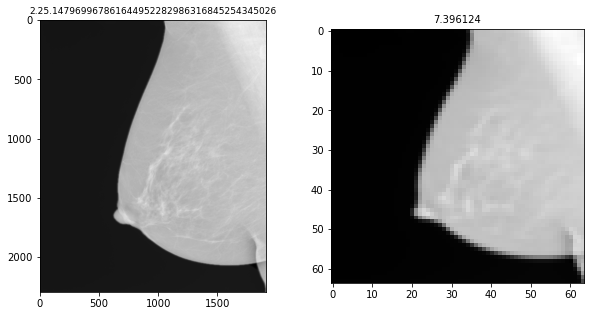

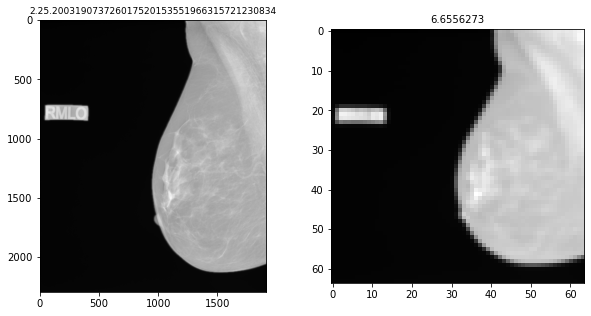

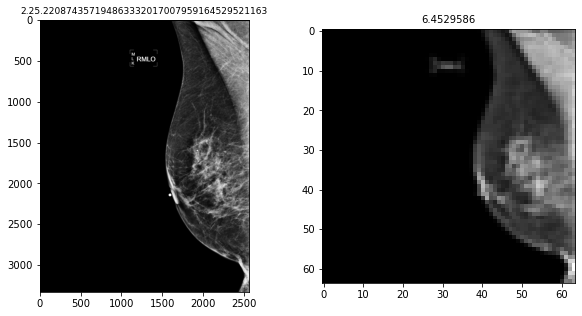

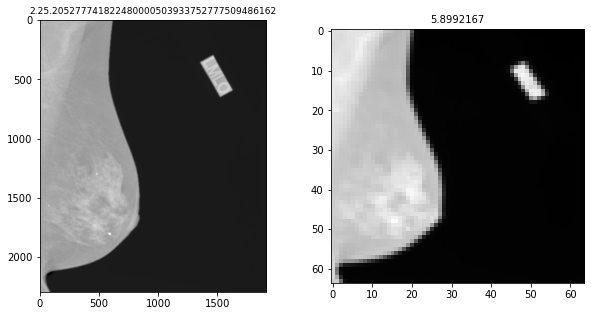

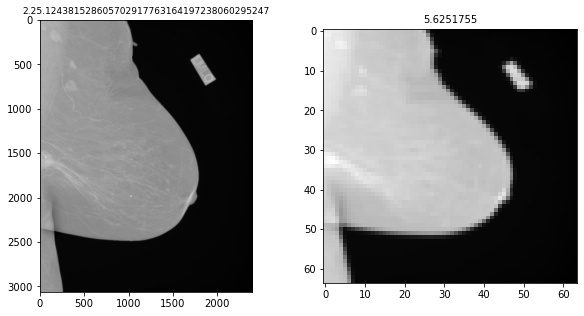

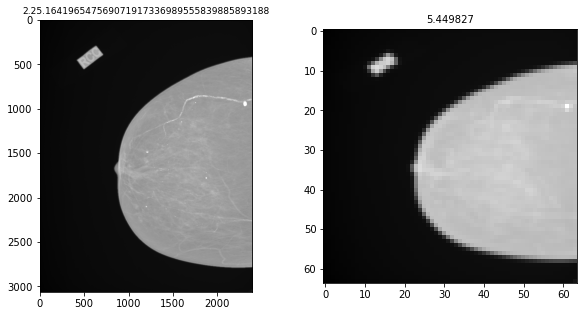

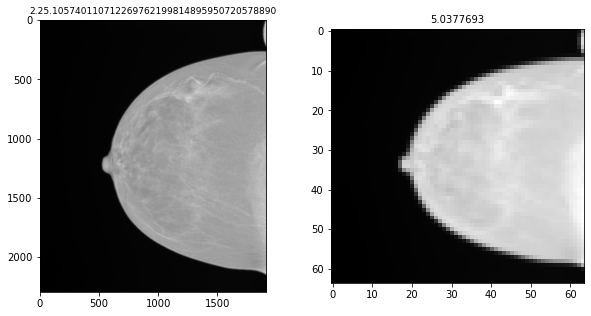

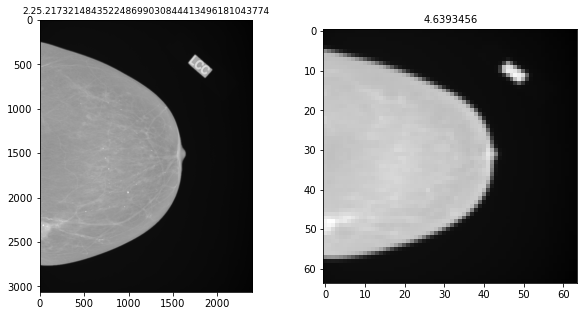

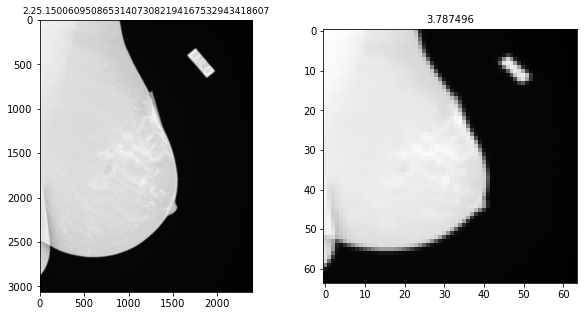

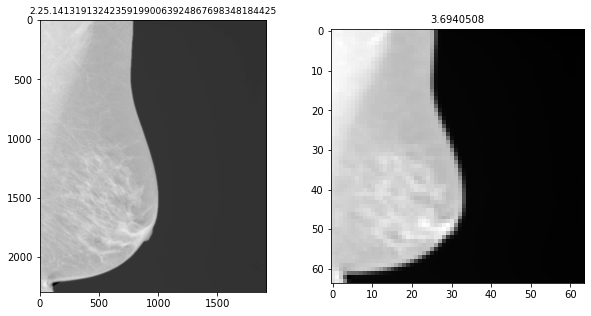

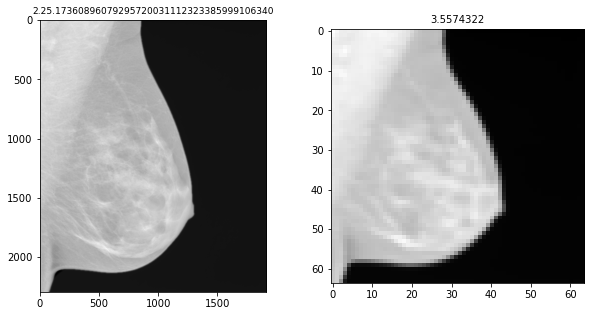

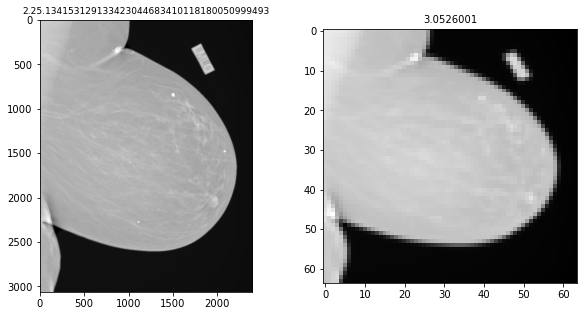

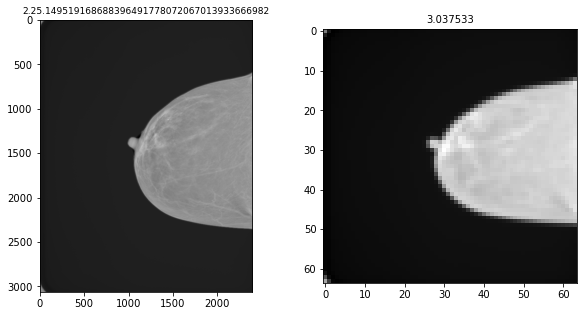

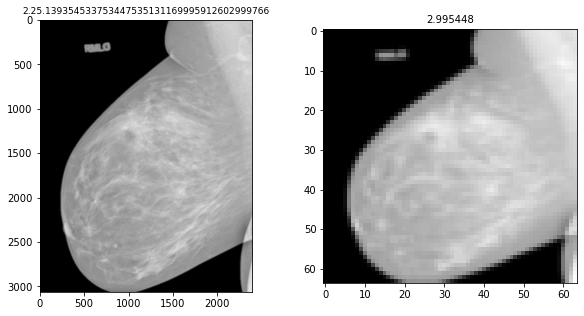

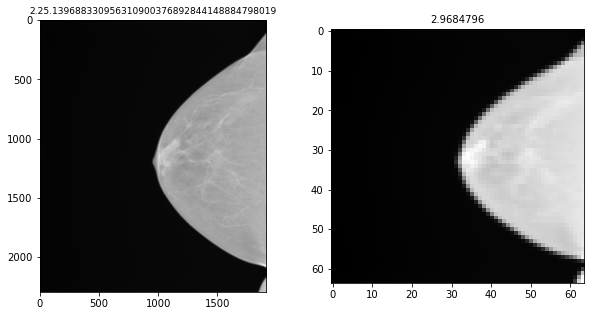

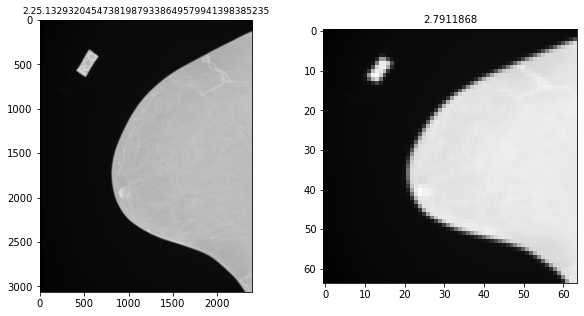

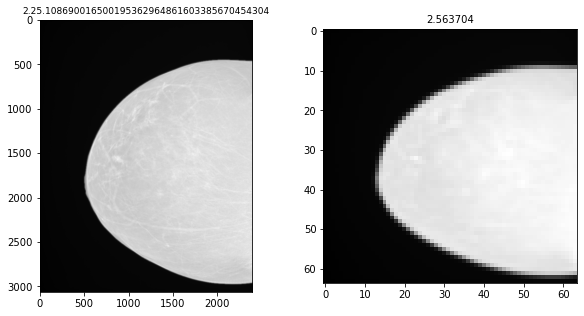

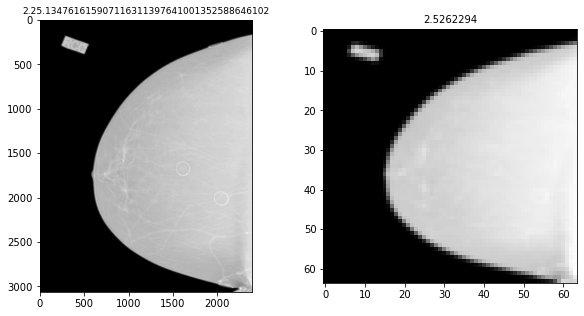

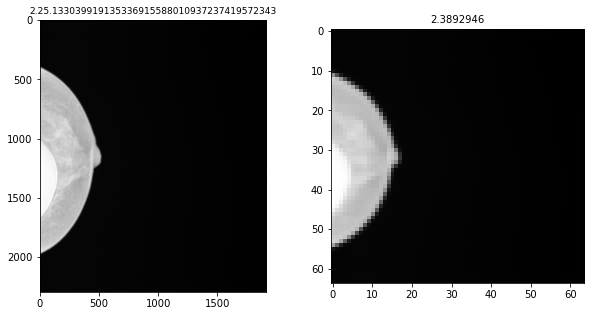

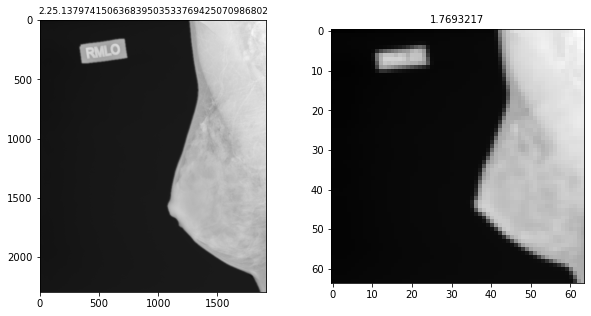

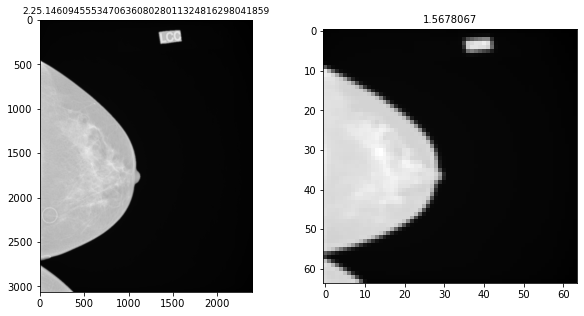

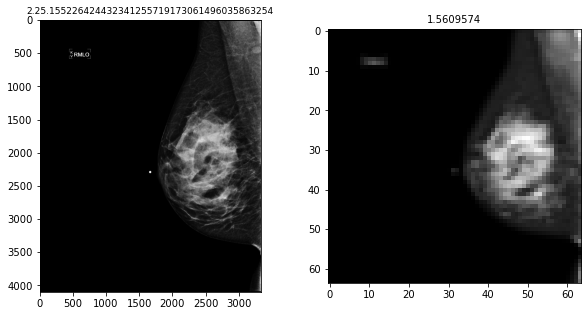

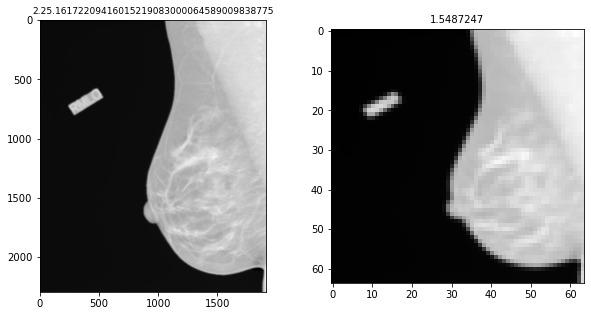

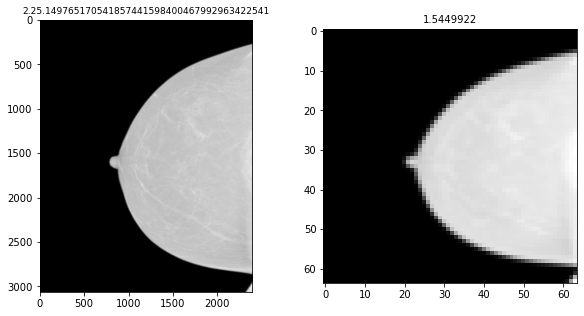

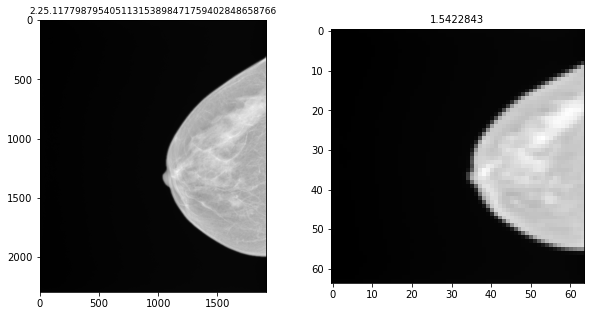

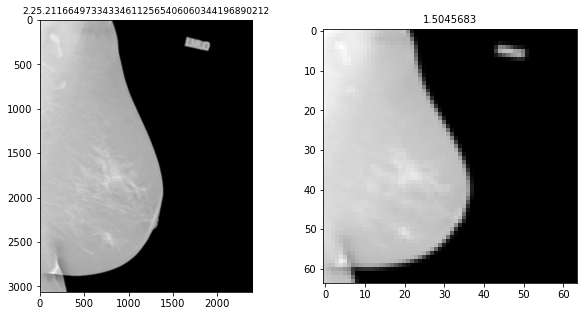

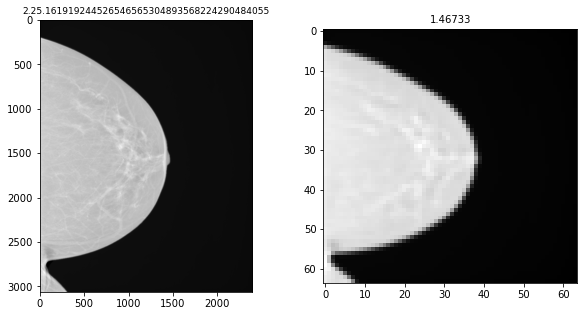

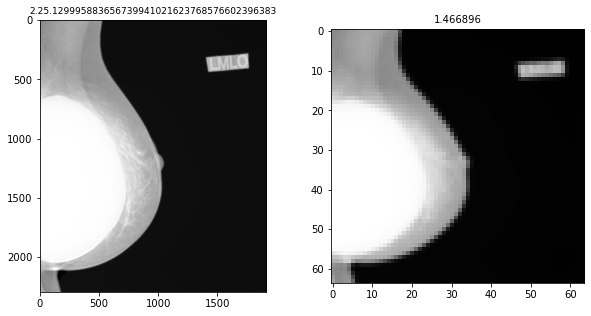

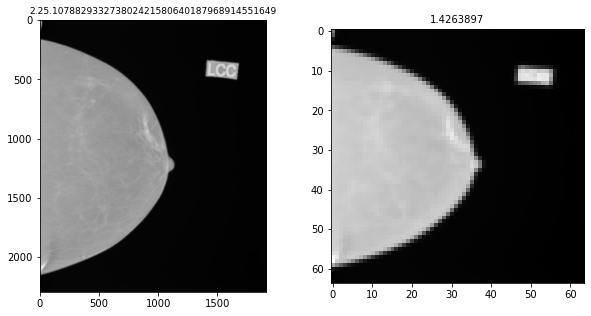

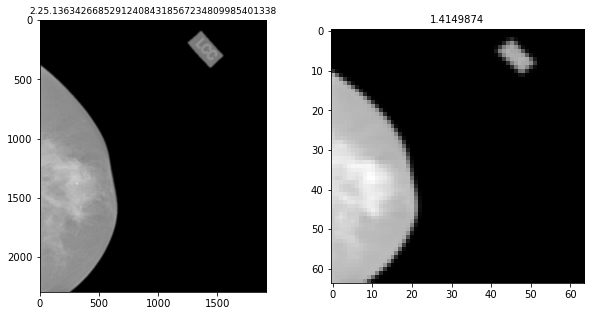

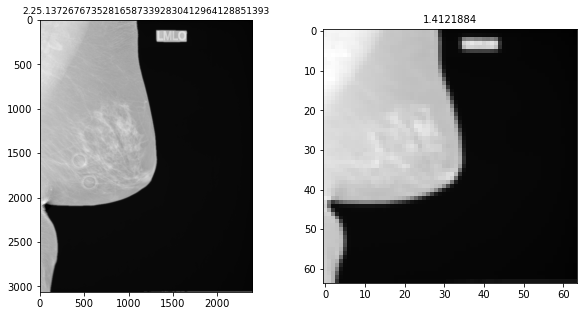

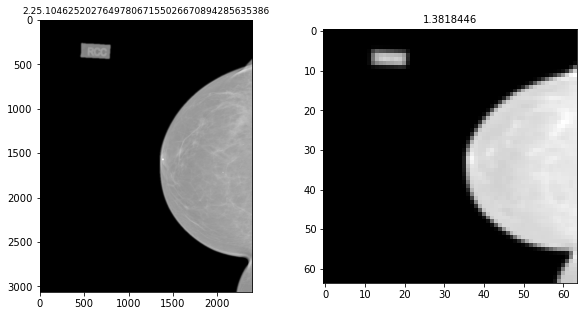

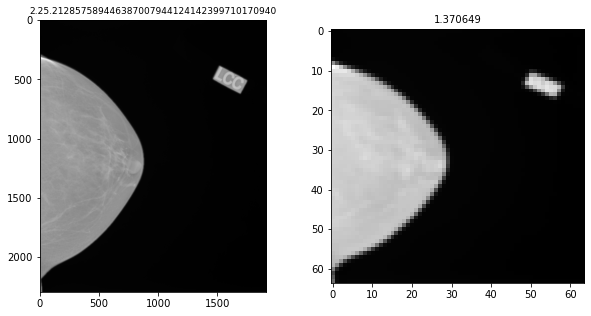

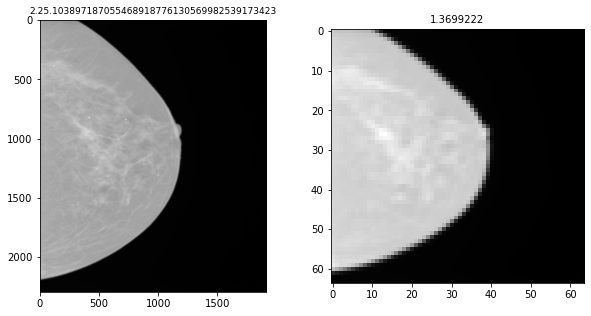

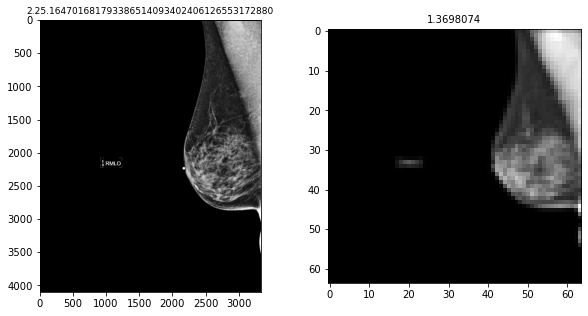

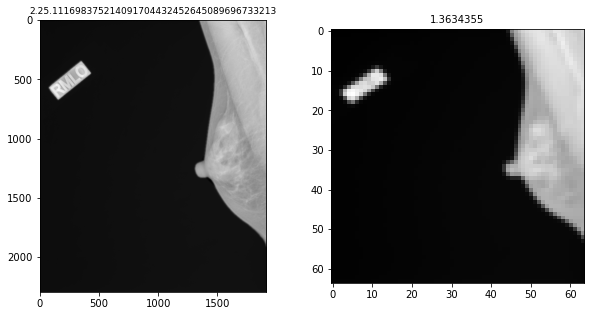

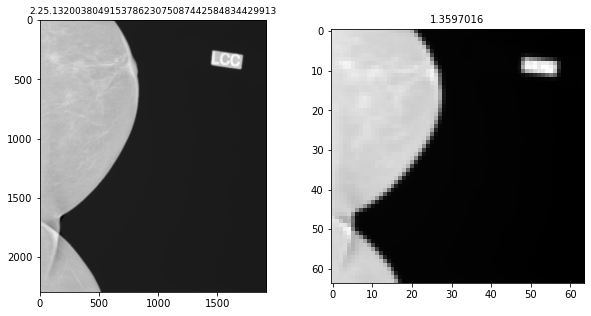

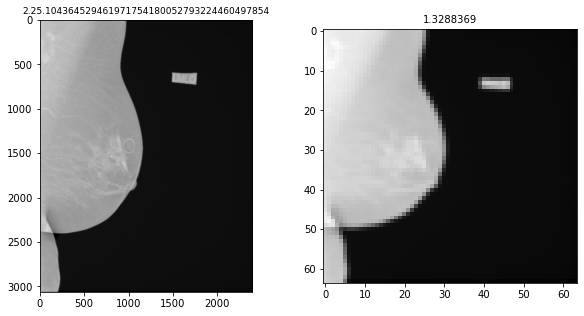

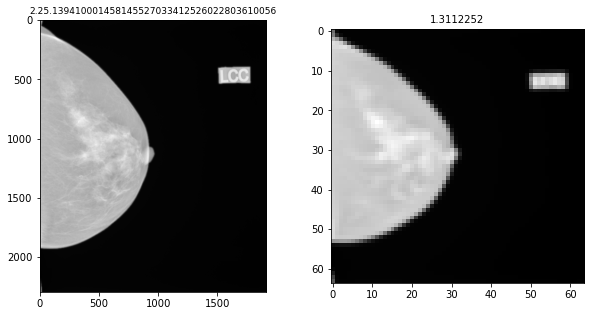

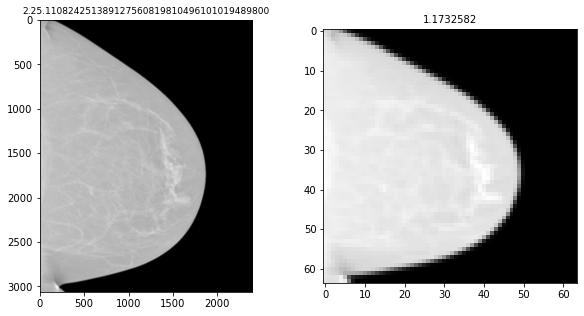

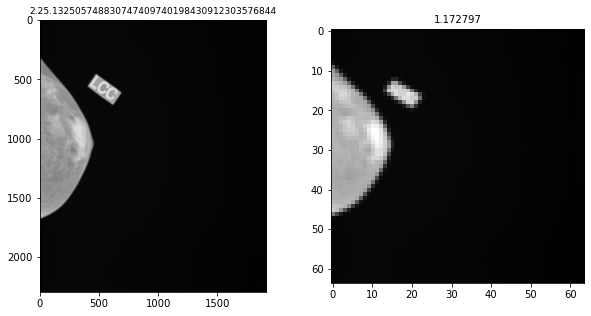

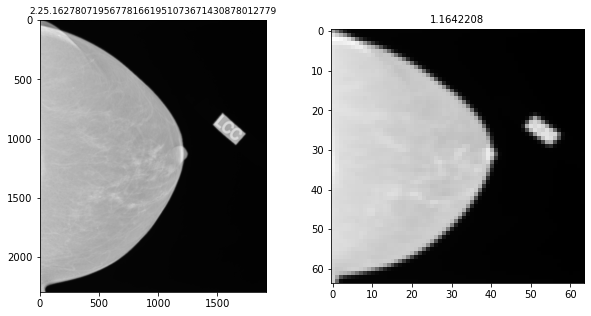

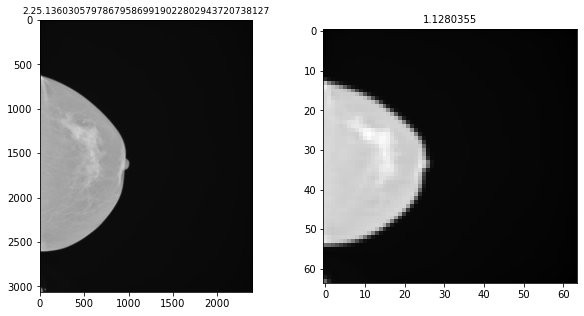

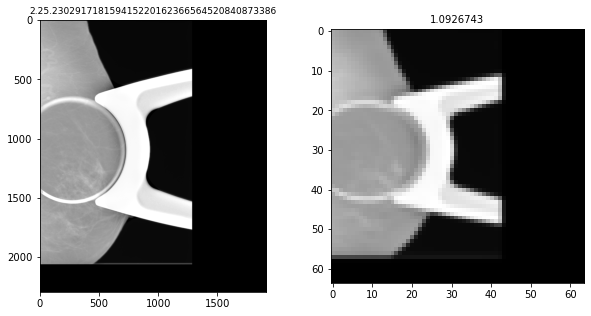

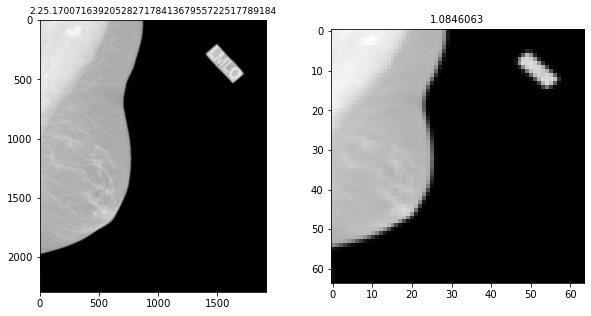

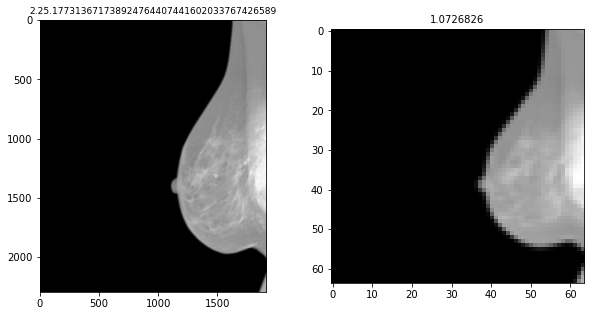

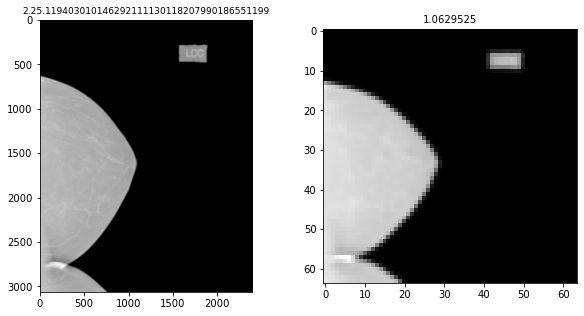

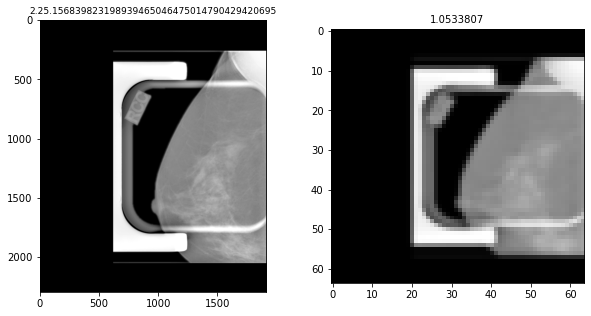

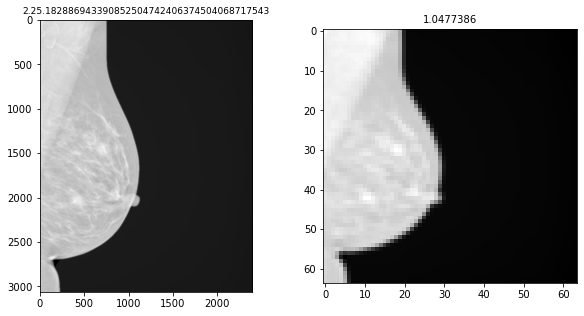

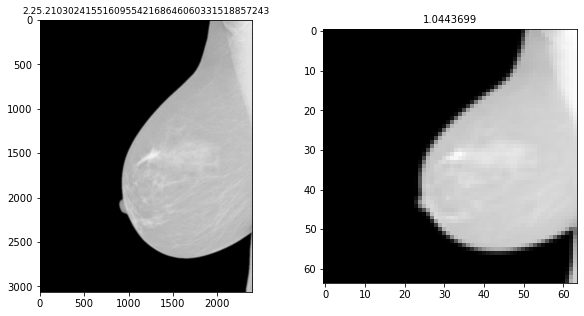

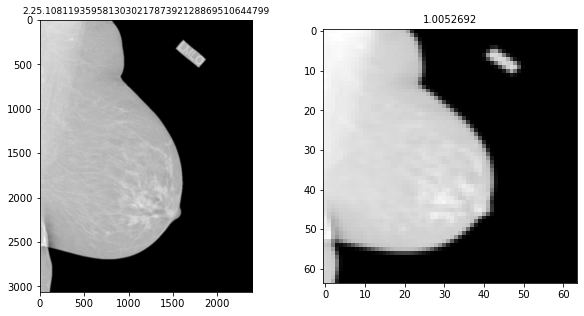

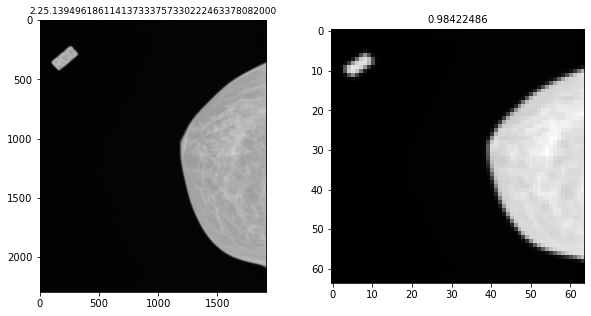

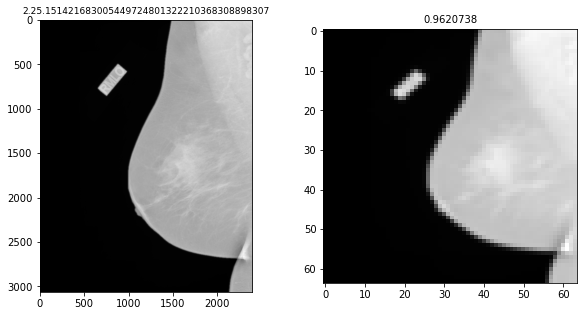

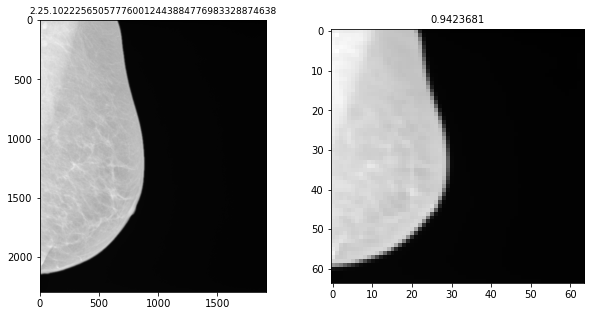

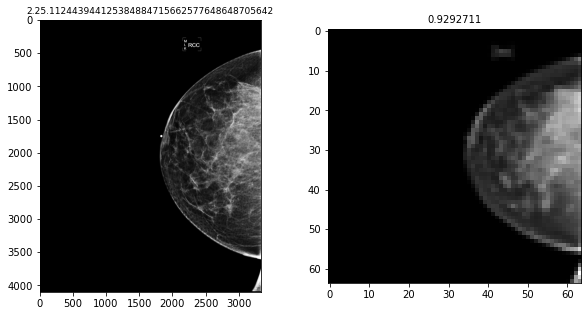

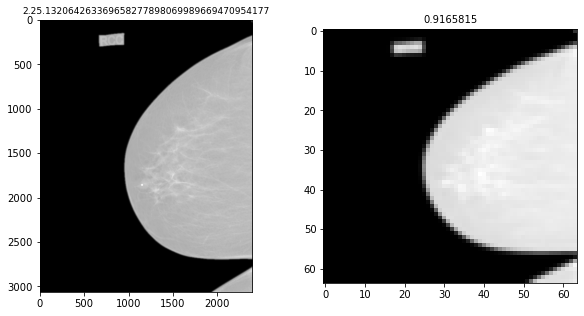

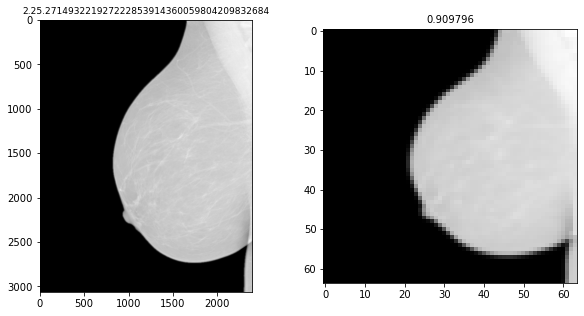

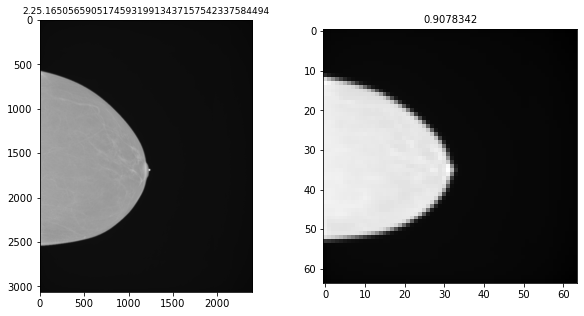

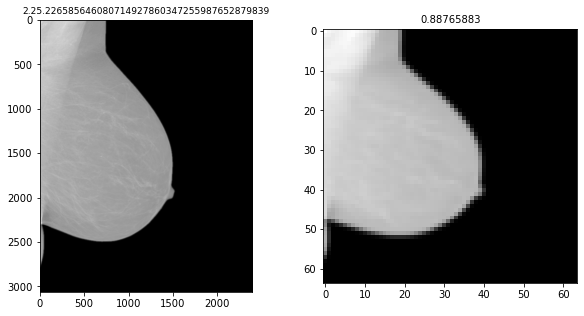

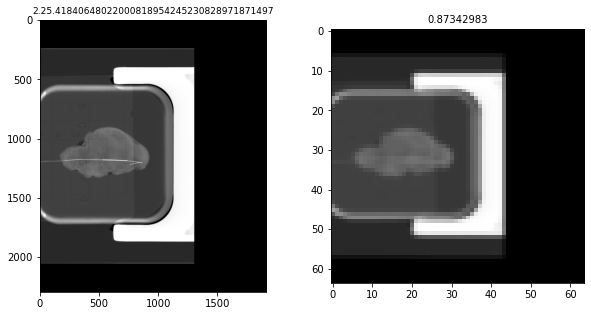

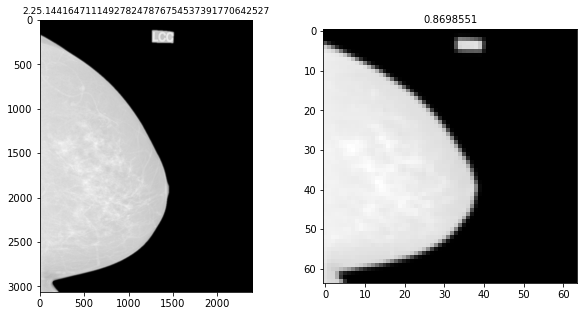

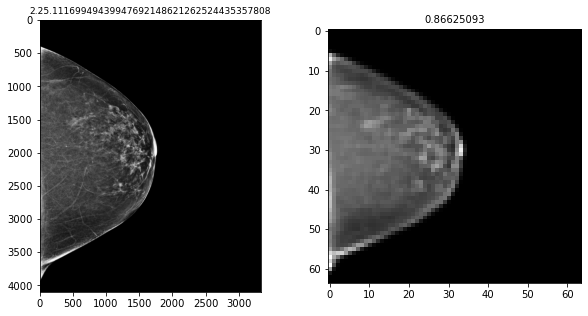

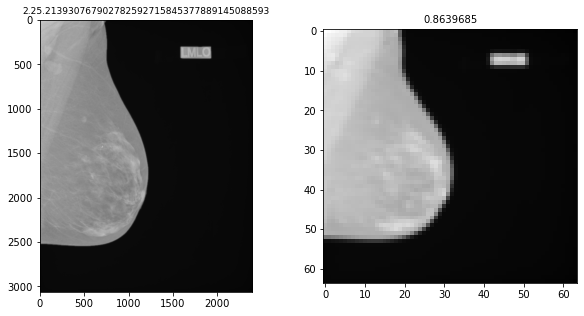

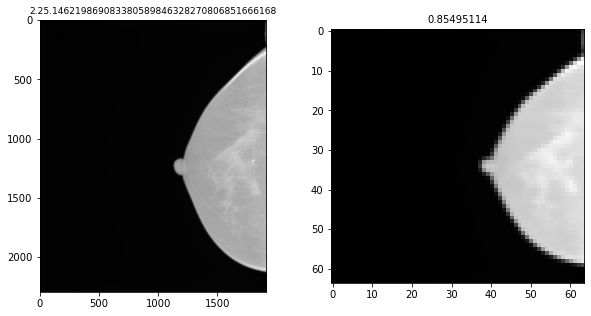

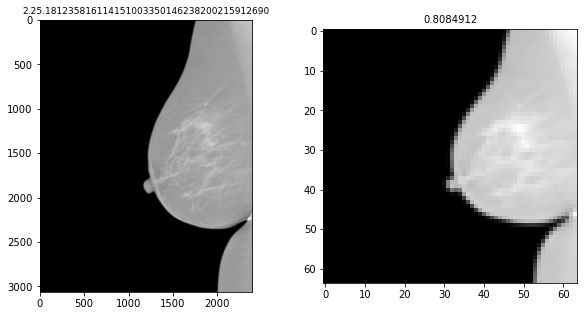

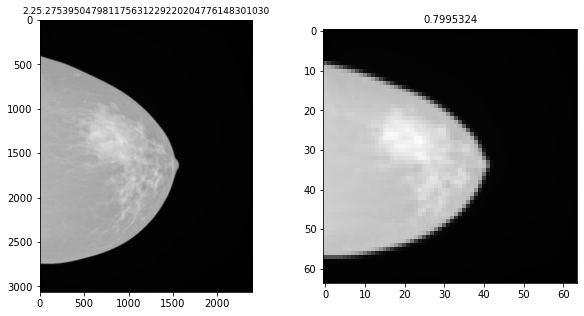

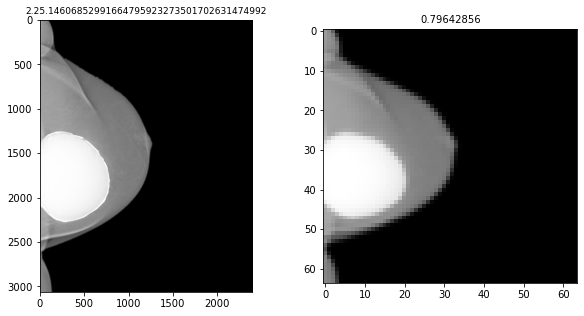

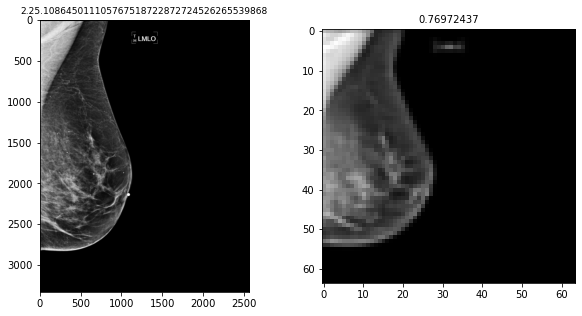

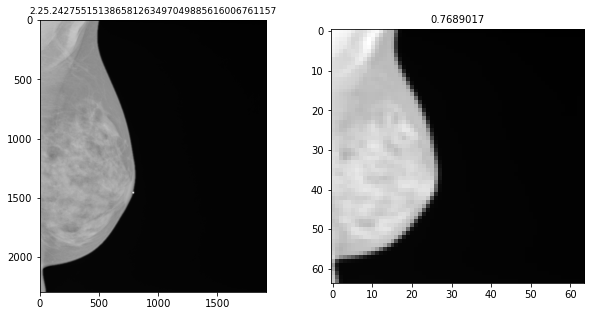

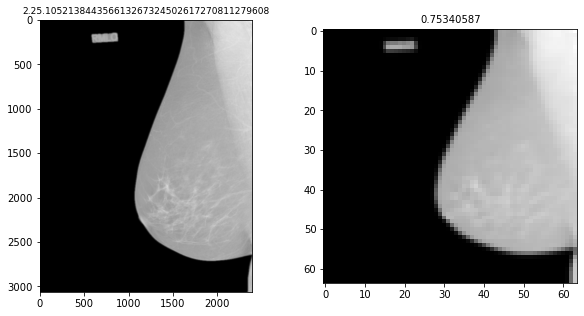

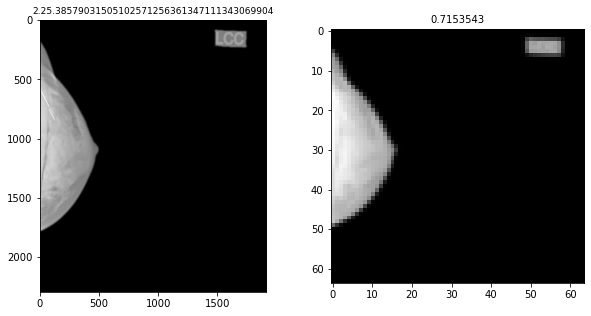

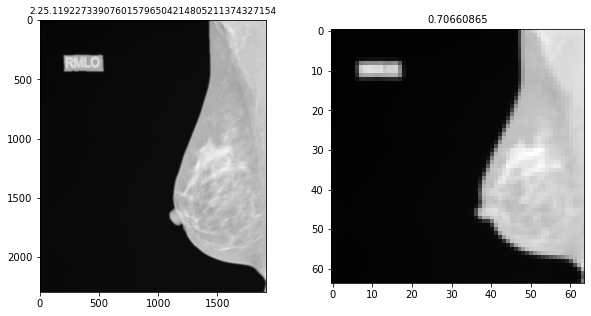

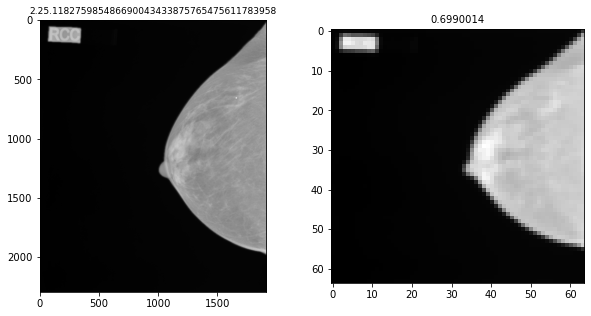

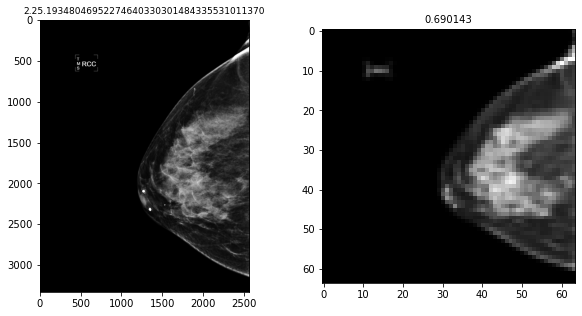

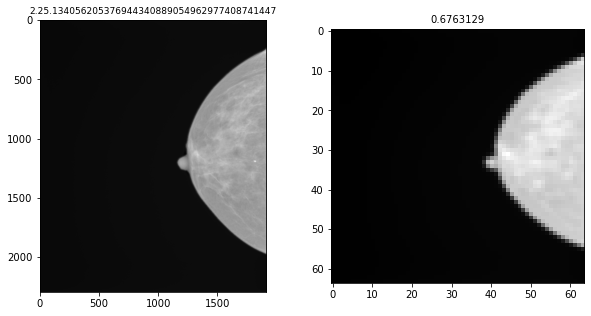

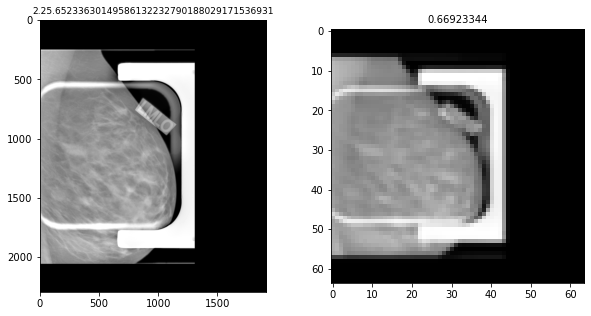

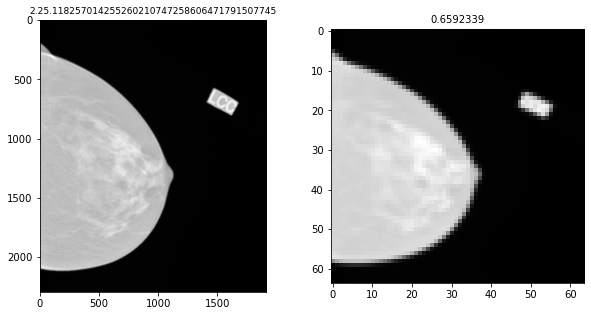

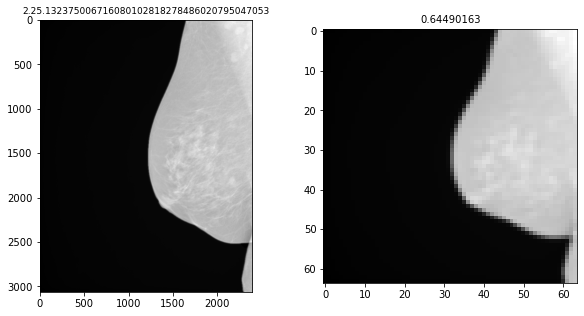

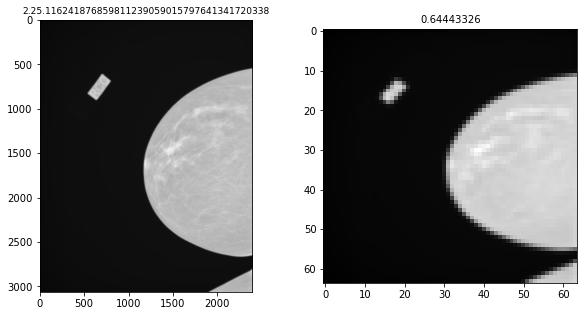

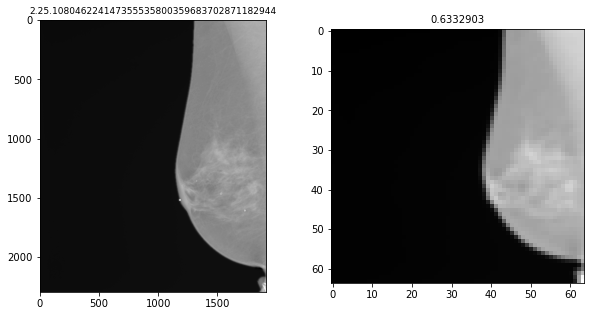

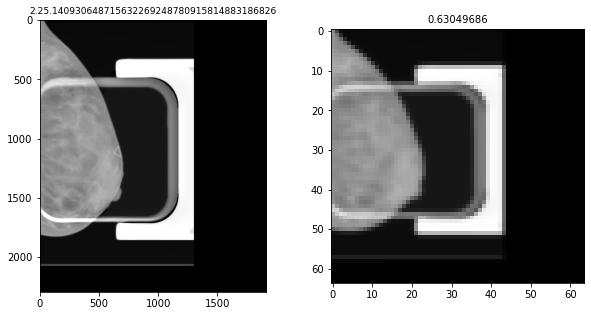

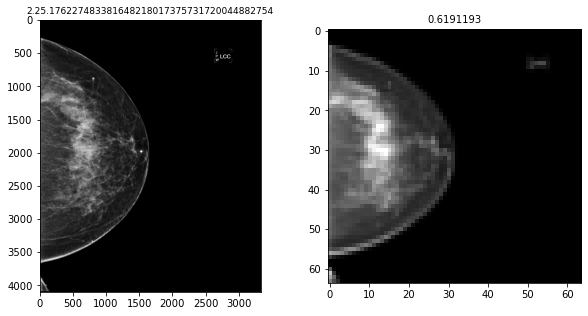

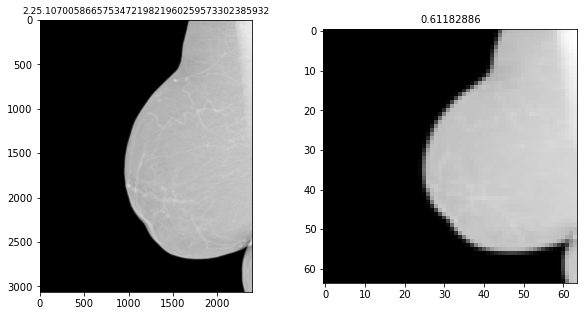

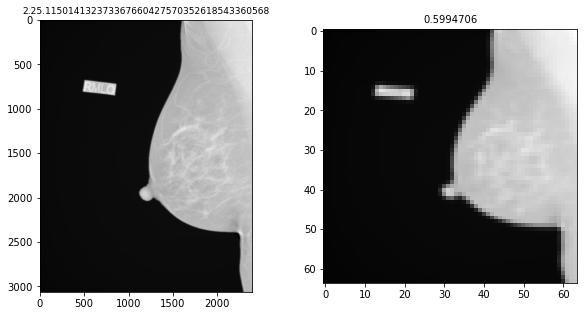

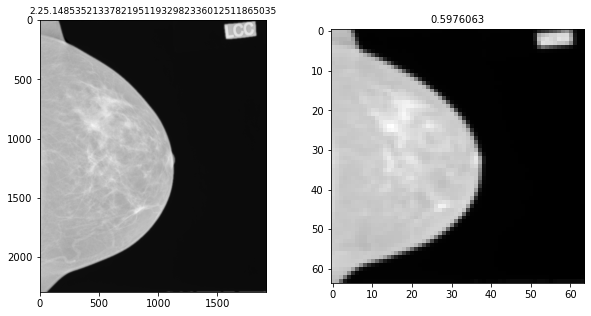

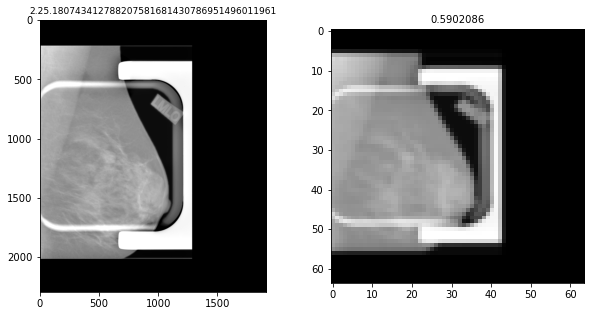

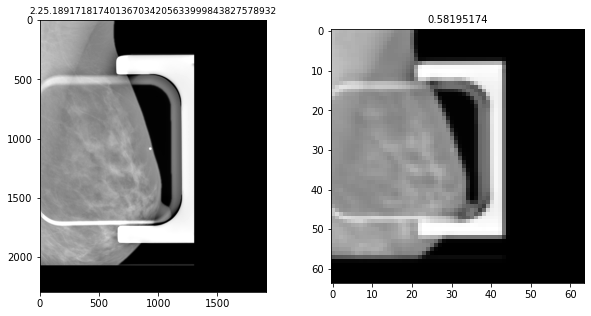

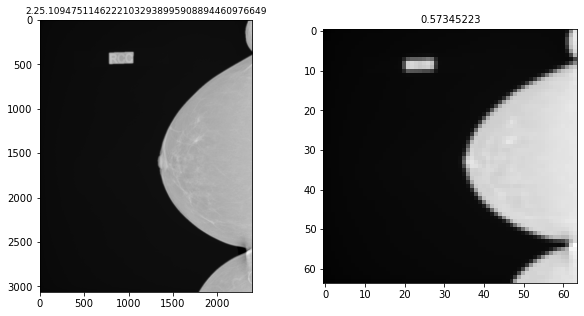

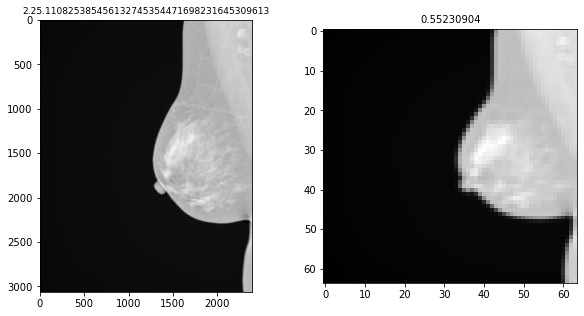

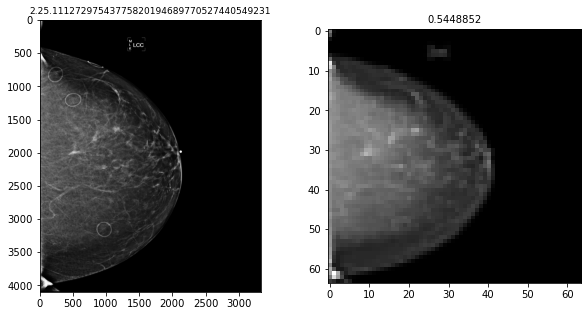

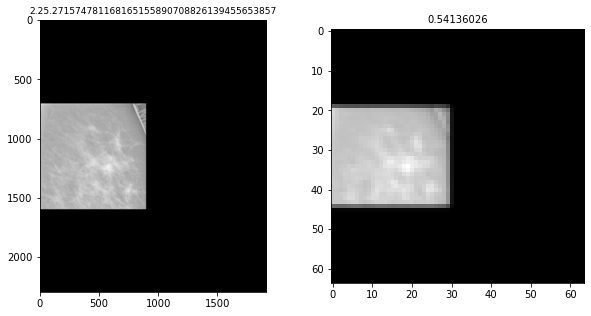

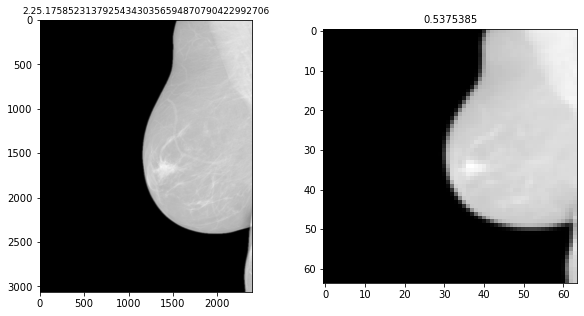

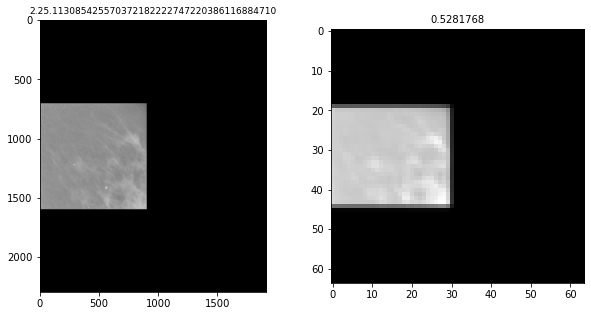

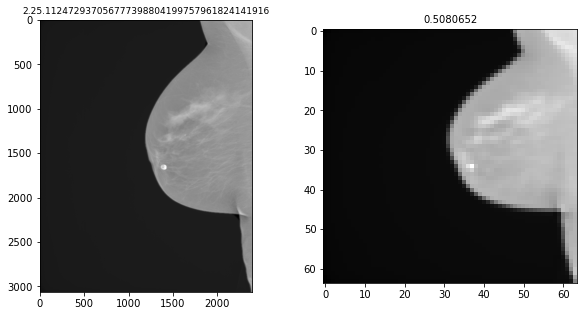

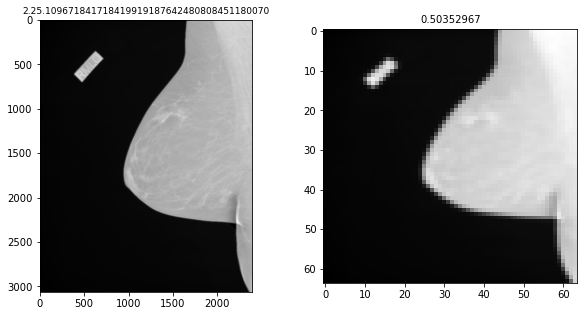

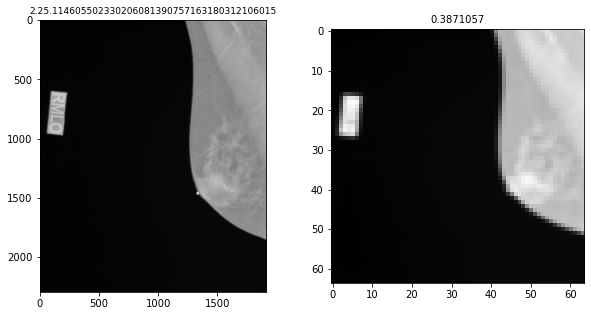

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='DeepSVDD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])